In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
bank_full_original = pd.read_csv("../Data/bank-additional-full.csv", sep = ';')

In [3]:
bank = bank_full_original.copy()

Check to make sure bank and bank_full_original are pointing to different objects in memory.

In [4]:
bank is bank_full_original

False

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# Special Note:

In pdays, there is a special code, 999, which indentifies individuals not previously contacted.

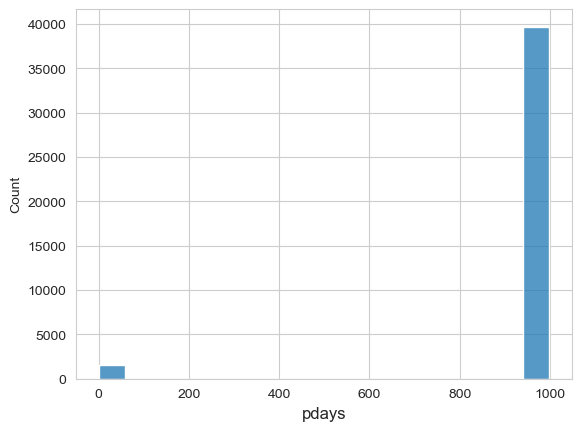

In [8]:
sns.histplot(data = bank,
               x = 'pdays')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.xlabel("pdays", fontsize=12)

plt.show()

In [9]:
bank.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Here we see that $96.32\% = 39673/41188$ of the people contacted were new. Here we choose to make numeric variable into a categorical variable with the following bins: 

- values 0-3 get mapped to first_4, 
- values 4-7 get mapped to second_4,
- get mapped to rest,
- 999 gets mapped to never.

We chose this breakdown as the 3 corresponding bins have roughly the same size: 541, 576, and 398. 

To achieve this we write a simple labeling function and use .apply().

In [13]:
def label_pdays(day: int )->str:
    if day == 999:
        return "never"
    elif 0<= day <= 3:
        return "first_4"
    elif 3 < day < 7:
        return "second_4"
    else:
        return "rest"

Further, we are going to drop the `duration` variable because of the casual relationship, if `duration` is $0$, then $y=$ no.

In [15]:
bank_clean = bank.drop(['duration'], axis = 1)

In [17]:
type(bank_clean['pdays'][0])

numpy.int64

In [18]:
bank_clean.loc[:, 'pdays'] = bank_clean.pdays.apply(label_pdays)

In [19]:
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Using boxplots and .describe(), we identified many outliers in serveral numeric variables. After further investigation we declined to exclude values from our model as we determined they were not caused by user error. 

# Tracking variables better.

The outcomes of the variables `default`, `housing`, and `loan` are identicial. As such we wrote another labeling function to better track with response correspondes to which variable. Also, we change the 'yes', 'no' response for the predicted variable to 1/0.

In [20]:
def label_yes_no_housing(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_h'

In [21]:
def label_yes_no_default(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_d'

In [29]:
def label_yes_no_loan(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_l'

In [30]:
def label_yes_no_y(word: str) -> str:
    """Input a `yes' or `no' and returns 0- no, 1- yes"""
    if word == 'yes':
        return 1
    else: 
        return 0

In [25]:
bank_clean.loc[:, 'default'] = bank_clean.default.apply(label_yes_no_default)

In [26]:
bank_clean.loc[:, 'housing'] = bank_clean.housing.apply(label_yes_no_housing)

In [27]:
bank_clean.loc[:, 'loan'] = bank_clean.loan.apply(label_yes_no_loan)

In [31]:
bank_clean.loc[:, 'y'] = bank_clean.y.apply(label_yes_no_y)

In [32]:
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no_d,no_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown_d,no_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no_d,yes_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no_d,no_h,no_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no_d,no_h,yes_l,telephone,may,mon,1,never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# One-hot encde the categorical variables.

In [37]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'poutcome']

In [34]:
numeric_variables = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

In [43]:
len(categorical_variables) + len(numeric_variables) == len(bank_clean.columns.tolist())

True

Next we create lists for each categorical variable which will we use to loop over for our one-hot encoding!

In [46]:
del bank_feature_word

In [49]:
bank_feature_job = list(bank_clean['job'].unique())
bank_feature_job.pop(len(bank_clean['job'].unique())-1)

'student'

In [50]:
bank_feature_job

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur']

In [53]:
for item in categorical_variables:
    bank_feature_item = list(bank_clean[item].unique())
    bank_feature_item.pop(len(bank_clean[item].unique())-1)

In [55]:
del bank_feature_item

In [56]:
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'pdays',
 'poutcome']

In [57]:
bank_feature_marital = list(bank_clean['marital'].unique())
bank_feature_marital.pop(len(bank_clean['marital'].unique())-1)

'unknown'

In [58]:
bank_feature_education = list(bank_clean['education'].unique())
bank_feature_education.pop(len(bank_clean['education'].unique())-1)

'illiterate'

In [59]:
bank_feature_default = list(bank_clean['default'].unique())
bank_feature_default.pop(len(bank_clean['default'].unique())-1)

'yes_d'

In [60]:
bank_feature_housing = list(bank_clean['housing'].unique())
bank_feature_housing.pop(len(bank_clean['housing'].unique())-1)

'unknown_h'

In [61]:
bank_feature_loan = list(bank_clean['loan'].unique())
bank_feature_loan.pop(len(bank_clean['loan'].unique())-1)

'unknown_l'

In [62]:
bank_feature_contact = list(bank_clean['contact'].unique())
bank_feature_contact.pop(len(bank_clean['contact'].unique())-1)

'cellular'

In [63]:
bank_feature_month = list(bank_clean['month'].unique())
bank_feature_month.pop(len(bank_clean['month'].unique())-1)

'sep'

In [64]:
bank_feature_day_of_week = list(bank_clean['day_of_week'].unique())
bank_feature_day_of_week.pop(len(bank_clean['day_of_week'].unique())-1)

'fri'

In [65]:
bank_feature_pdays = list(bank_clean['pdays'].unique())
bank_feature_pdays.pop(len(bank_clean['pdays'].unique())-1)

'rest'

In [66]:
bank_feature_poutcome = list(bank_clean['poutcome'].unique())
bank_feature_poutcome.pop(len(bank_clean['poutcome'].unique())-1)

'success'

Make a dictionary to store all of our features!

In [67]:
bank_features_train = {'job' : bank_feature_job, 'marital' : bank_feature_marital, 'education' : bank_feature_education, 'default' : bank_feature_default, 'housing':bank_feature_housing, 'loan':bank_feature_loan, 'contact' : bank_feature_contact, 'month':bank_feature_month, 'day_of_week':bank_feature_day_of_week, 'pdays':bank_feature_pdays, 'poutcome':bank_feature_poutcome}

In [68]:
bank_features_train

{'job': ['housemaid',
  'services',
  'admin.',
  'blue-collar',
  'technician',
  'retired',
  'management',
  'unemployed',
  'self-employed',
  'unknown',
  'entrepreneur'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['basic.4y',
  'high.school',
  'basic.6y',
  'basic.9y',
  'professional.course',
  'unknown',
  'university.degree'],
 'default': ['no_d', 'unknown_d'],
 'housing': ['no_h', 'yes_h'],
 'loan': ['no_l', 'yes_l'],
 'contact': ['telephone'],
 'month': ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu'],
 'pdays': ['never', 'second_4', 'first_4'],
 'poutcome': ['nonexistent', 'failure']}

Write loop to one-hot encode our dataset.

In [70]:
for k in bank_features_train.keys():
    for v in bank_features_train[k]:
        bank_clean[v] = pd.get_dummies(bank_clean[k])[v]

In [73]:
len(bank_clean.columns.tolist())

65

In [74]:
bank_clean.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
371,37,blue-collar,married,basic.9y,no_d,no_h,yes_l,telephone,may,tue,...,0,0,1,0,0,1,0,0,1,0
32823,39,admin.,single,university.degree,no_d,yes_h,yes_l,cellular,may,mon,...,0,1,0,0,0,1,0,0,1,0
22591,32,technician,divorced,high.school,no_d,no_h,no_l,cellular,aug,fri,...,0,0,0,0,0,1,0,0,1,0
14755,24,blue-collar,married,basic.9y,unknown_d,no_h,no_l,cellular,jul,wed,...,0,0,0,1,0,1,0,0,1,0
20869,45,services,married,high.school,unknown_d,yes_h,no_l,cellular,aug,thu,...,0,0,0,0,1,1,0,0,1,0
28777,30,admin.,single,high.school,no_d,no_h,no_l,cellular,apr,thu,...,1,0,0,0,1,1,0,0,1,0
33606,27,blue-collar,single,basic.9y,no_d,yes_h,no_l,cellular,may,tue,...,0,0,1,0,0,1,0,0,0,1
2197,33,admin.,married,high.school,no_d,yes_h,yes_l,telephone,may,mon,...,0,1,0,0,0,1,0,0,1,0
9390,54,technician,married,university.degree,unknown_d,no_h,no_l,telephone,jun,fri,...,0,0,0,0,0,1,0,0,1,0
38280,44,blue-collar,single,professional.course,no_d,no_h,no_l,cellular,oct,tue,...,0,0,1,0,0,1,0,0,1,0


Now subset bank_clean to get just columns we need to train our model.

In [76]:
features_to_subset = numeric_variables + bank_feature_job + bank_feature_marital + bank_feature_education + bank_feature_default + bank_feature_housing + bank_feature_loan + bank_feature_contact + bank_feature_month + bank_feature_day_of_week + bank_feature_pdays + bank_feature_poutcome

In [77]:
features_to_subset

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'married',
 'single',
 'divorced',
 'basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'no_d',
 'unknown_d',
 'no_h',
 'yes_h',
 'no_l',
 'yes_l',
 'telephone',
 'may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'mar',
 'apr',
 'mon',
 'tue',
 'wed',
 'thu',
 'never',
 'second_4',
 'first_4',
 'nonexistent',
 'failure']

In [78]:
len(features_to_subset)

55

In [79]:
bank_clean_ready = bank_clean[features_to_subset]

In [80]:
bank_clean_ready

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,0,0,1,0,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,0,0,1,0,0,1,0


Scale the first 8 columns

In [81]:
bank_clean_ready_scaled = bank_clean_ready.copy()

In [84]:
bank_clean_ready_scaled is bank_clean_ready

False

In [83]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

bank_clean_ready_scaled[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(bank_clean_ready_scaled[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [88]:
bank_clean_ready_scaled

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,...,0,0,0,0,0,1,0,0,1,0
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,...,0,0,0,0,0,1,0,0,1,0


# Data is now ready to model! 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [90]:
## Making the split

bank_train, bank_test = train_test_split(bank_clean_ready_scaled.copy(),
                                         random_state = 440,
                                         shuffle = True,
                                         test_size = .2, 
                                         stratify = bank['y'])

In [91]:
log_reg = LogisticRegression()
log_reg.fit(bank_train,bank_train['y'])

LogisticRegression()

In [96]:
bank_train.sample(10)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housemaid,...,apr,mon,tue,wed,thu,never,second_4,first_4,nonexistent,failure
7123,0.669404,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.714190,0.331680,0,0,...,0,0,0,0,1,1,0,0,1,0
8917,0.381527,0.156105,-0.349494,0.839061,1.536429,-0.280328,0.717649,0.845170,0,0,...,0,0,0,0,1,1,0,0,1,0
24076,-0.386145,-0.565922,1.671136,-0.115781,-0.649003,-0.323542,0.600607,0.398115,0,0,...,0,0,0,1,0,1,0,0,0,1
31316,0.669404,-0.565922,-0.349494,-1.197935,-1.179380,-1.231034,-1.318759,-0.940281,0,0,...,0,0,0,1,0,1,0,0,1,0
25881,-0.865939,-0.565922,-0.349494,-0.115781,-0.649003,-0.323542,0.287536,0.398115,0,0,...,0,0,0,1,0,1,0,0,1,0
16783,0.861322,-0.565922,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,0,0,...,0,0,0,0,1,1,0,0,1,0
34653,-0.865939,0.156105,-0.349494,-1.197935,-1.179380,-1.231034,-1.357965,-0.940281,0,0,...,0,0,0,0,1,1,0,0,1,0
6251,-0.098268,0.517118,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,1,0,0,1,0,0,1,0
35103,-0.290186,-0.204909,-0.349494,-1.197935,-1.179380,-1.231034,-1.367190,-0.940281,0,0,...,0,0,0,0,0,1,0,0,1,0
37568,2.972418,-0.565922,-0.349494,-1.898153,-2.374889,1.966794,-1.586859,-1.257233,1,0,...,0,0,0,0,0,1,0,0,1,0


In [93]:
pred = log_reg.predict(bank_train)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(bank_train['y'], pred)

array([[29238,     0],
       [    0,  3712]], dtype=int64)